In [7]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/



In [51]:
heart_disease <- read_csv("https://raw.githubusercontent.com/maggie63/dsci-100-group-34/main/data/heart.csv") |>
    select("age", "thalach", "trestbps", "chol", "target") |>
    mutate(target = as_factor(target))
heart_recipe <- recipe(target ~ age + trestbps + chol + thalach, data = heart_disease) |>
                       step_scale(all_predictors()) |>
                       step_center(all_predictors())
heart_scaled <- heart_recipe |>  
                           prep() |> 
                           bake(heart_disease)

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [52]:
heart_split <- initial_split(heart_scaled, prop = 0.75, strata = target)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

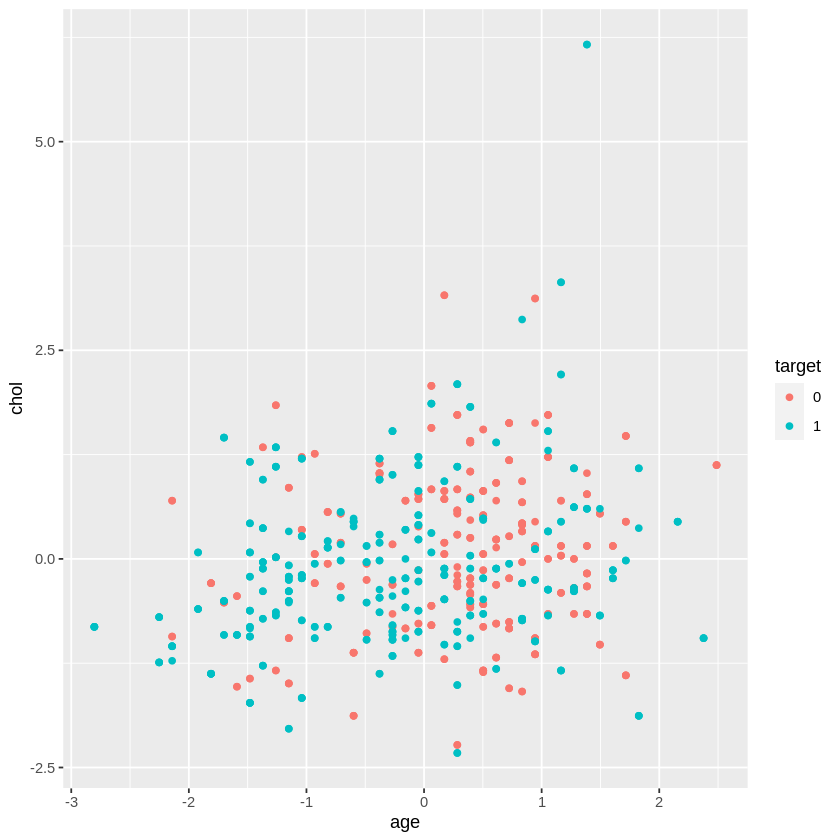

In [53]:
heart_plot <- heart_training |>
    ggplot(aes(x = age, y = chol, colour = target)) +
    geom_point()
heart_plot